In [24]:
### This cell imports the aggregated percent_return.csv data as a Pandas dataframe
import pandas as pd

filepath = 'data/2024-08-20_2024-08-28/aggregated/percent_return.csv'
df = pd.read_csv(filepath)
# Set 'date' as the index
df.set_index('date', inplace=True)

print("Original Data:")
print(df)

Original Data:
                   A       AAL      AAPL      ABBV      ABNB       ABT  \
date                                                                     
2024-08-20 -0.604556 -0.193991  0.327763 -0.492087 -1.311590 -0.939012   
2024-08-21  0.007151  0.289293 -0.052980  0.045814 -0.304982  0.378479   
2024-08-22 -3.549321 -2.593655 -1.431140 -0.324856 -1.894972  0.277303   
2024-08-23 -0.240784  1.564035  0.522907  0.152093  0.180040  0.258008   
2024-08-26 -0.439370 -2.109303  0.185217 -0.060739 -0.975609 -0.035481   
2024-08-27  0.441351 -0.877194  0.898230 -1.045511  1.248911  0.035380   

                ACGL       ACN      ADBE       ADI  ...       WTW        WY  \
date                                                ...                       
2024-08-20 -0.165095  0.133362 -0.395050 -0.600793  ...  0.000000 -0.886374   
2024-08-21  1.356591  0.834243  0.651090 -1.268410  ...  0.162415  0.067980   
2024-08-22  1.680193 -0.994342 -1.698204 -2.055718  ...  0.670818 -1.113459 

In [25]:
### This cell creates the absolute correlation matrix for the company daily return data.

# Compute the correlation matrix
abs_corr_matrix = df.corr().abs()

print("\nAbsolute Correlation Matrix:")
print(abs_corr_matrix.head())

# Convert correlation to dissimilarity
dissimilarity_matrix = 1 - abs_corr_matrix

print("\nDissimilarity Matrix:")
print(dissimilarity_matrix.head())



Absolute Correlation Matrix:
             A       AAL      AAPL      ABBV      ABNB       ABT      ACGL  \
A     1.000000  0.599691  0.939133  0.089338  0.770071  0.134033  0.302000   
AAL   0.599691  1.000000  0.573182  0.324521  0.495119  0.000859  0.222627   
AAPL  0.939133  0.573182  1.000000  0.247899  0.783155  0.288920  0.361505   
ABBV  0.089338  0.324521  0.247899  1.000000  0.341382  0.361958  0.427492   
ABNB  0.770071  0.495119  0.783155  0.341382  1.000000  0.257035  0.146604   

           ACN      ADBE       ADI  ...       WTW        WY      WYNN  \
A     0.915393  0.707404  0.636090  ...  0.209866  0.167775  0.423294   
AAL   0.274760  0.066090  0.419187  ...  0.876109  0.851985  0.818091   
AAPL  0.849723  0.636818  0.786043  ...  0.276415  0.170029  0.237985   
ABBV  0.215356  0.552409  0.575797  ...  0.447428  0.543768  0.450976   
ABNB  0.793042  0.678317  0.905711  ...  0.242403  0.260471  0.446886   

           XEL       XOM       XYL       YUM       ZBH      ZB

In [26]:
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist, squareform

# Calculate linkage using dissimilarity matrix

dissimilarity_linkage_data = linkage(dissimilarity_matrix, method='complete')

C:\Users\alain\AppData\Local\Temp\ipykernel_35824\1719917102.py:6: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  dissimilarity_linkage_data = linkage(dissimilarity_matrix, method='complete')


In [27]:
# Companies from Technology and Healthcare sectors
tech_companies = ['AAPL', 'MSFT', 'NVDA', 'ADBE', 'CRM', 'INTC', 'CSCO', 'QCOM', 'AMD', 'ORCL']
healthcare_companies = ['JNJ', 'UNH', 'PFE', 'MRK', 'ABBV', 'LLY', 'TMO', 'BMY', 'CI', 'GILD']

selected_companies = tech_companies + healthcare_companies

In [28]:
# Turn data into a set of points
data = list(zip(df.values.flatten()))

# Select the 10 selected tech companies

tech_data = df[tech_companies]

# Compute linkage for top 10 tech companies

tech_dissimilarity = linkage(tech_data, method = 'complete')

# Get the 10 selected healthcare companies from DataFrame

healthcare_data = df[healthcare_companies]

# Compute linkage for top 10 healthcare companies

healthcare_dissimilarity = linkage(healthcare_data, method='complete')

In [29]:
# Get dissimilarity for both of the selected tech and healthcare companies

selected_dissimilarity = linkage(df[selected_companies].T, method='complete')


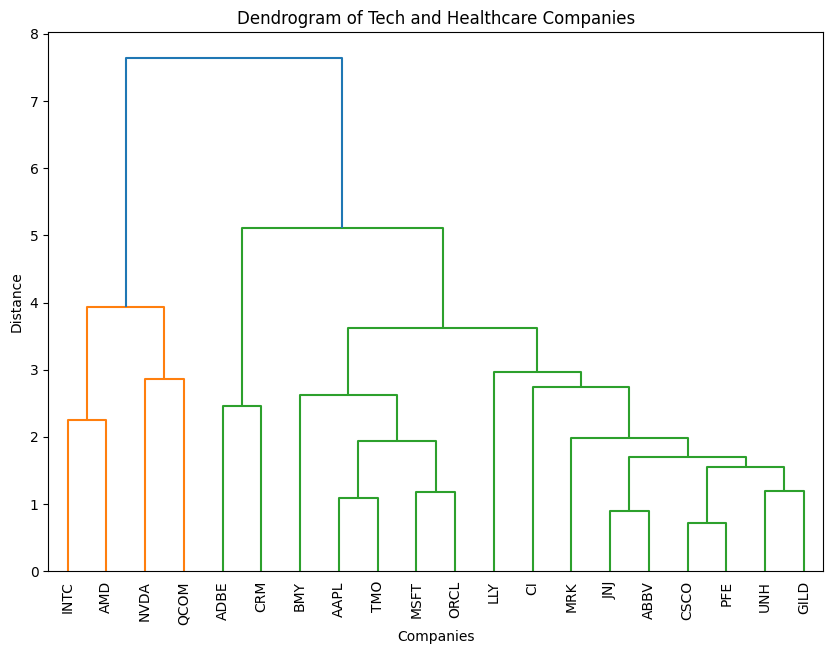

In [30]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(10, 7))
dendrogram(selected_dissimilarity, labels=df[selected_companies].columns, leaf_rotation=90, leaf_font_size=10)
plt.title('Dendrogram of Tech and Healthcare Companies')
plt.xlabel('Companies')
plt.ylabel('Distance')
plt.show()

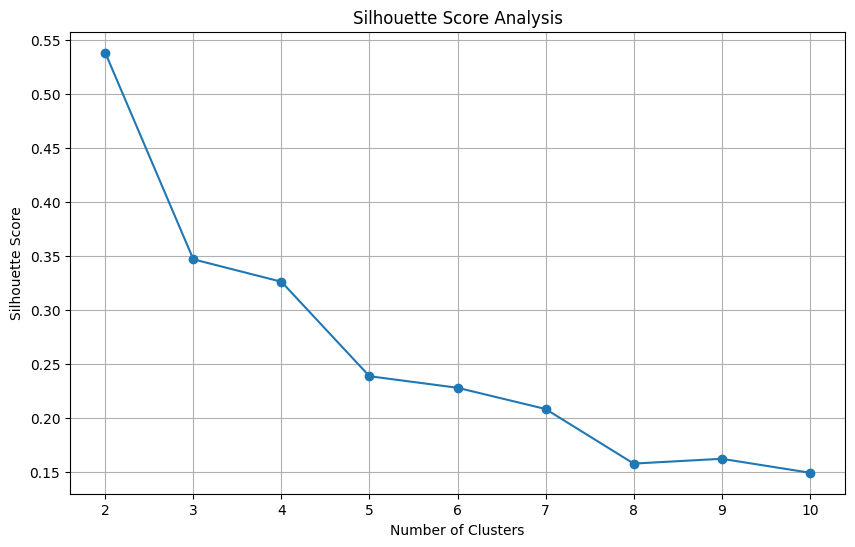

In [31]:
# For Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import silhouette_score

range_n_clusters = range(2, 11) # range of clusters to test

silhouette_scores = []

for n_clusters in range_n_clusters:
    # Apply Agglomerative Clustering with a specified number of clusters
    cluster_labels = fcluster(selected_dissimilarity, n_clusters, criterion='maxclust')
    
    # Calculate the silhouette score for each number of clusters
    score = silhouette_score(df[selected_companies].T, cluster_labels)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Score Analysis')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

In [32]:
import numpy as np

# To find the optimal number of clusters 
optimal_n_clusters = range_n_clusters[np.argmax(silhouette_scores)]
optimal_n_clusters

2

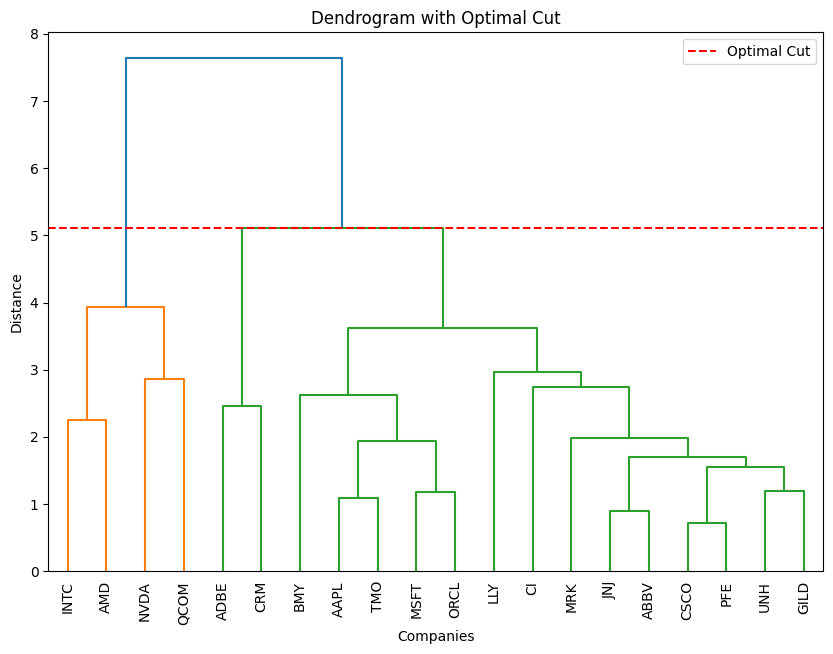

In [33]:
plt.figure(figsize=(10, 7))
dendrogram(selected_dissimilarity, labels=df[selected_companies].columns, leaf_rotation=90, leaf_font_size=10)
plt.axhline(y=selected_dissimilarity[-optimal_n_clusters, 2], color='r', linestyle='--', label='Optimal Cut')
plt.title('Dendrogram with Optimal Cut')
plt.xlabel('Companies')
plt.ylabel('Distance')
plt.legend()
plt.show()

In [34]:
# import matplotlib.pyplot as plt 

# experiment with different linkage methods for best silhouette score
linkage_methods = ['single', 'complete', 'average', 'centroid', 'ward']
linkage_outputs = []

for m in linkage_methods:
    # tech_dissimilarity_m = linkage(tech_data, method=m)
    # healthcare_dissimilarity_m = linkage(healthcare_data, method=m)
    selected_dissimilarity_m = linkage(df[selected_companies].T, method=m)
    linkage_outputs.append(selected_dissimilarity_m)

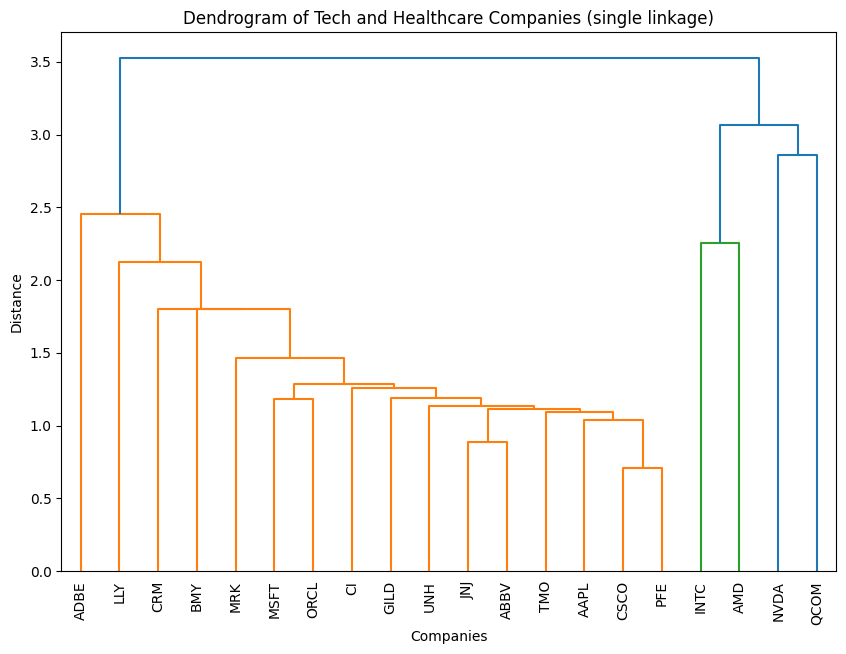

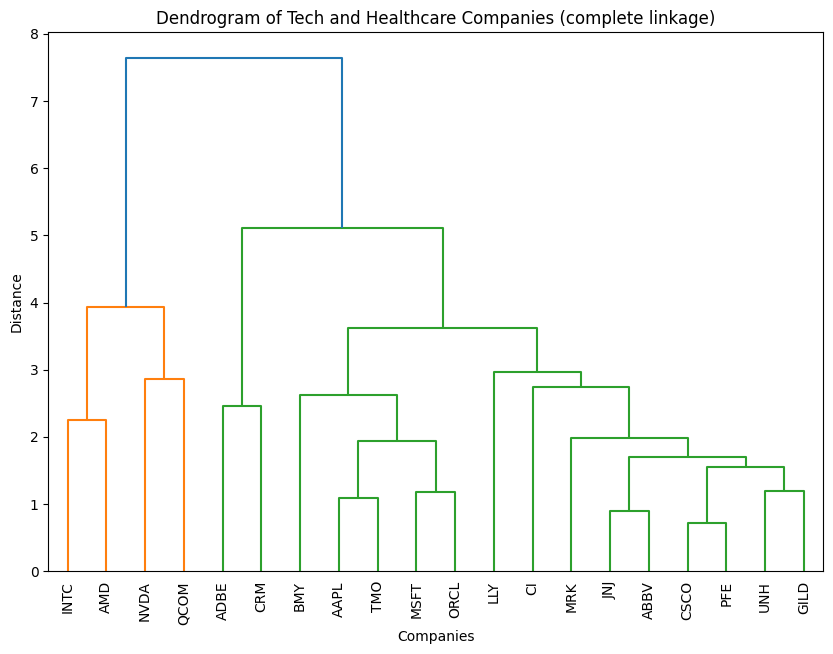

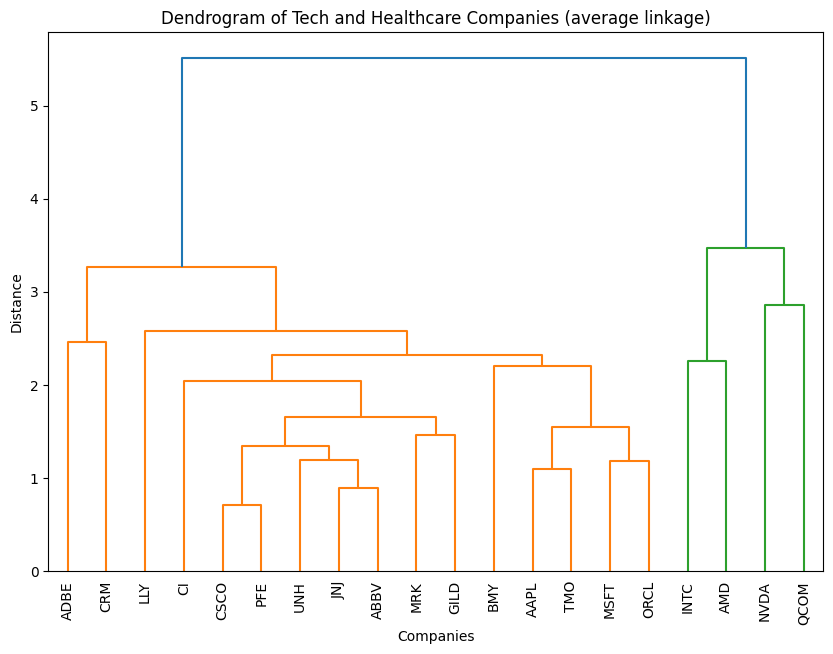

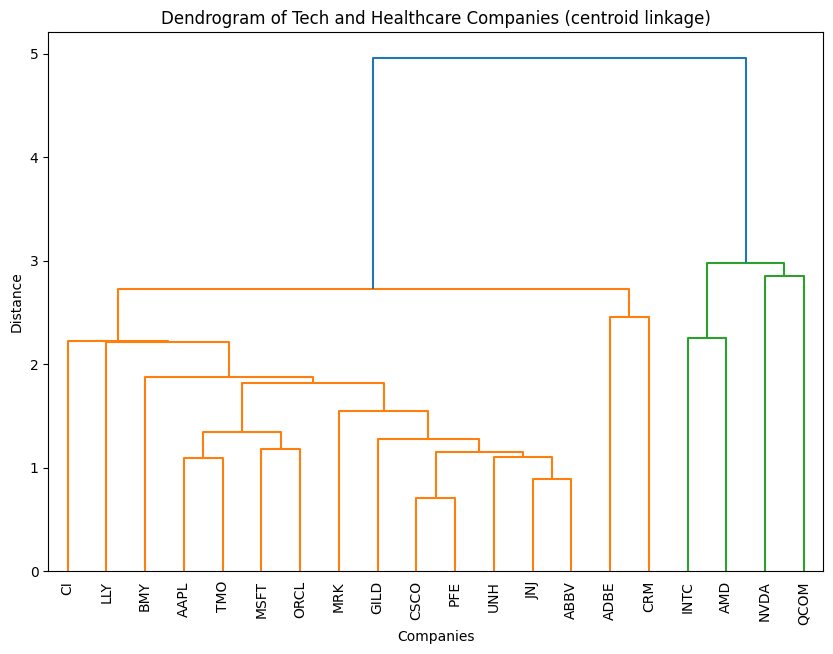

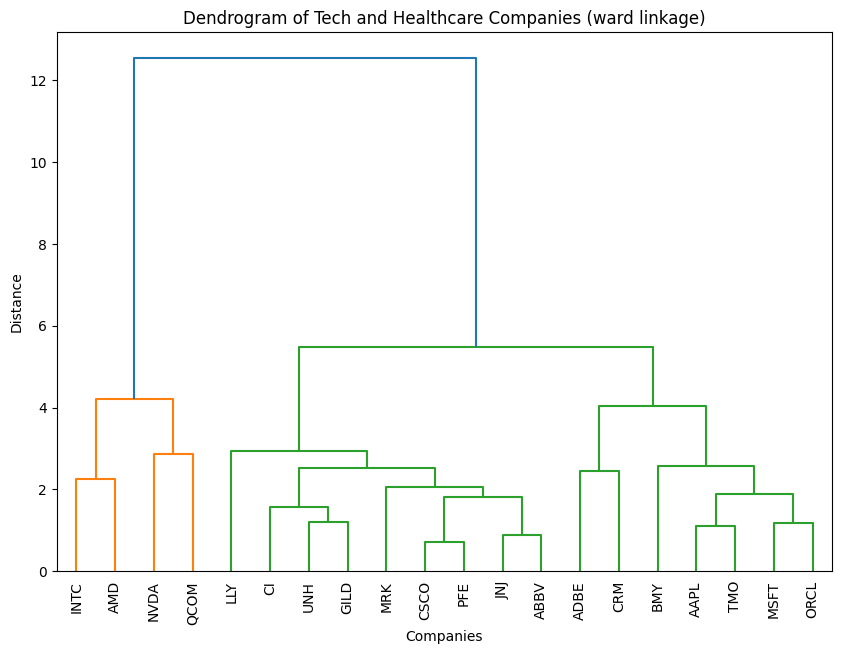

In [35]:
for i, m in enumerate(linkage_methods):
    plt.figure(figsize=(10, 7))
    dendrogram(linkage_outputs[i], labels=df[selected_companies].columns, leaf_rotation=90, leaf_font_size=10)
    plt.title(f'Dendrogram of Tech and Healthcare Companies ({m} linkage)')
    plt.xlabel('Companies')
    plt.ylabel('Distance')
    plt.show()

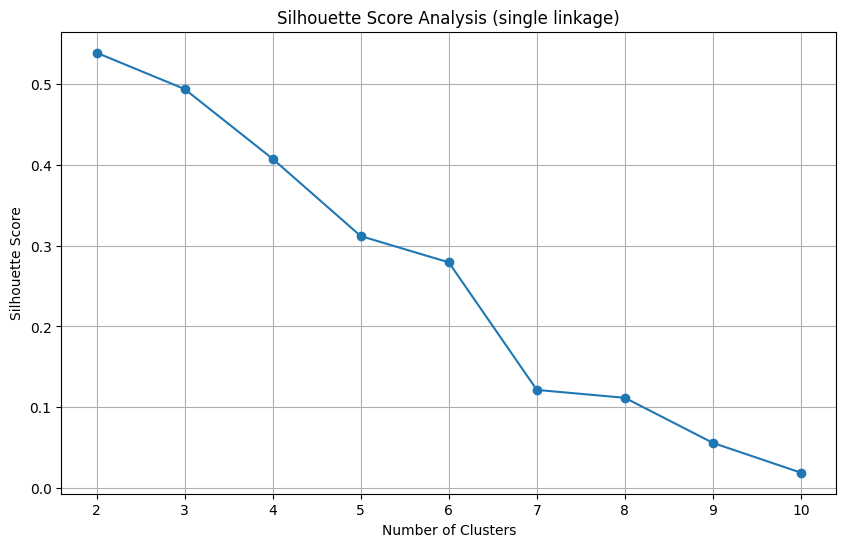

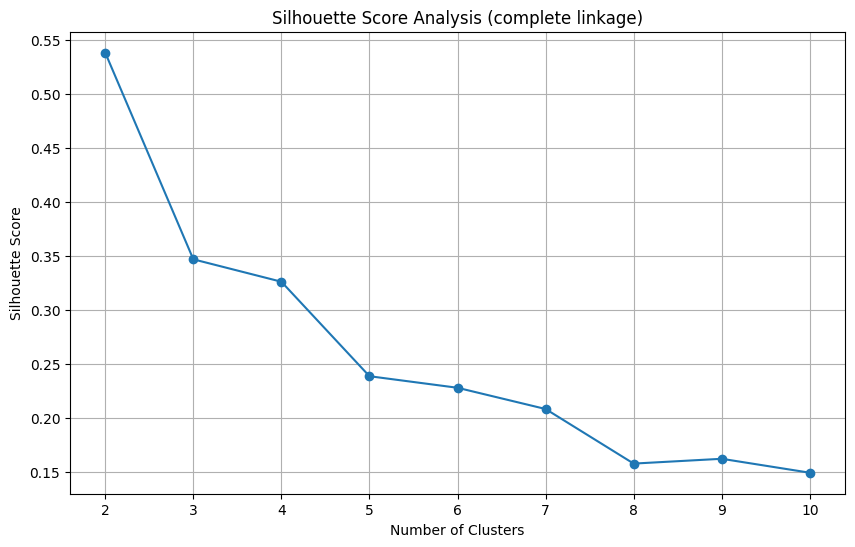

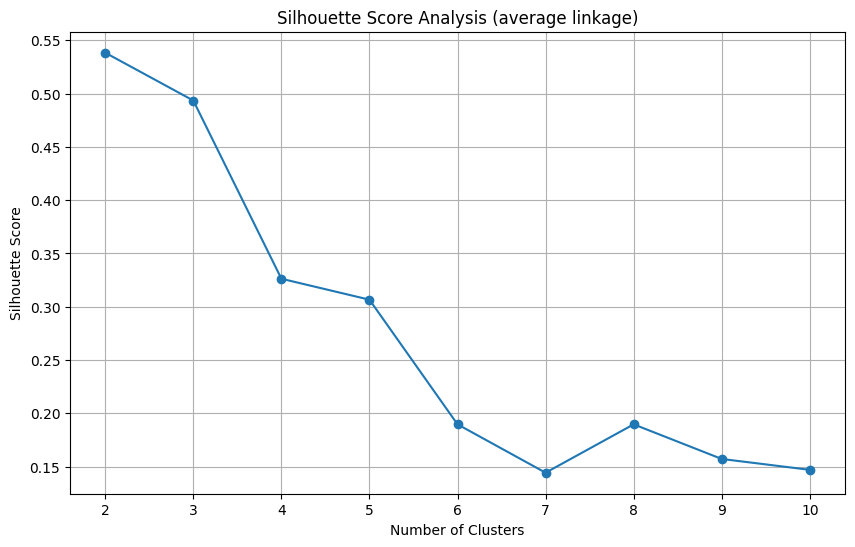

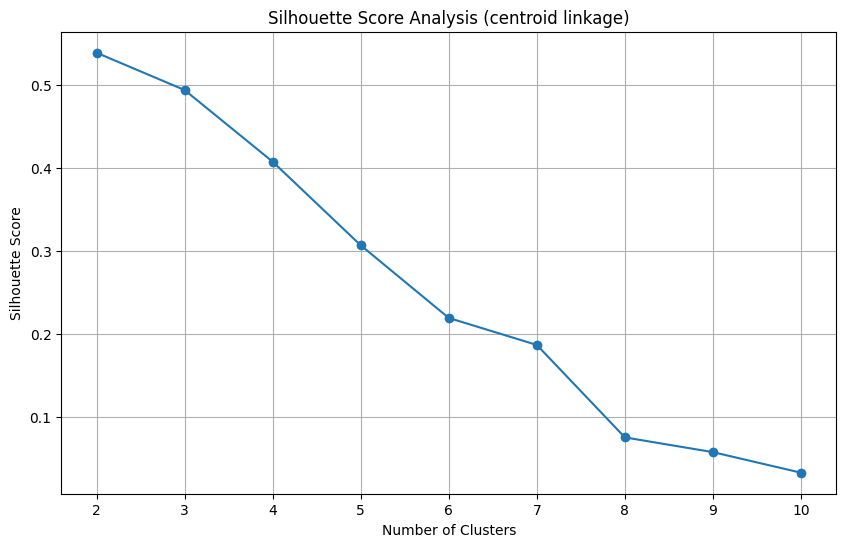

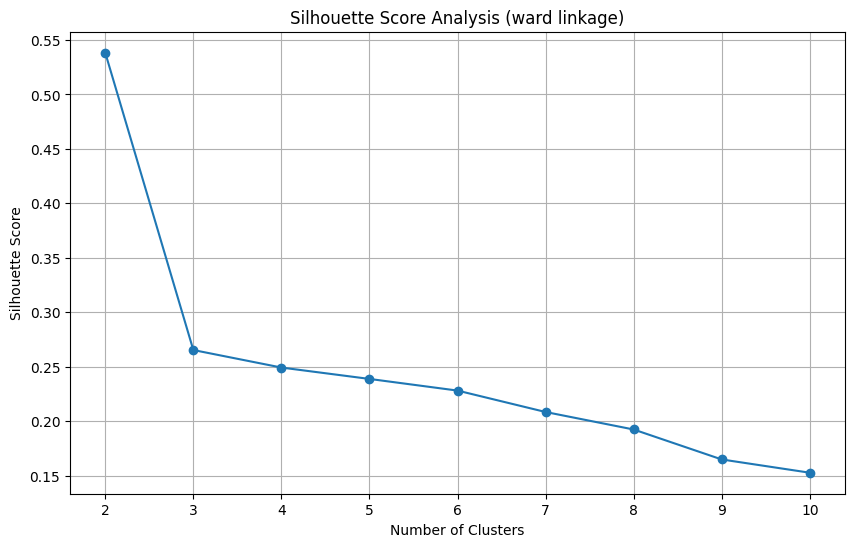

In [38]:
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import silhouette_score

range_n_clusters = range(2, 11) # range of clusters to test
all_silhouette_scores = []

for i, m in enumerate(linkage_methods):
    silhouette_scores_m = []

    for n_clusters in range_n_clusters:
        # Apply Agglomerative Clustering with a specified number of clusters
        cluster_labels = fcluster(linkage_outputs[i], n_clusters, criterion='maxclust')

        # Calculate the silhouette score for each number of clusters
        score = silhouette_score(df[selected_companies].T, cluster_labels)
        silhouette_scores_m.append(score)
    
    all_silhouette_scores.append(silhouette_scores_m)

    plt.figure(figsize=(10, 6))
    plt.plot(range_n_clusters, silhouette_scores_m, marker='o')
    plt.title(f'Silhouette Score Analysis ({m} linkage)')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.grid(True)
    plt.show()

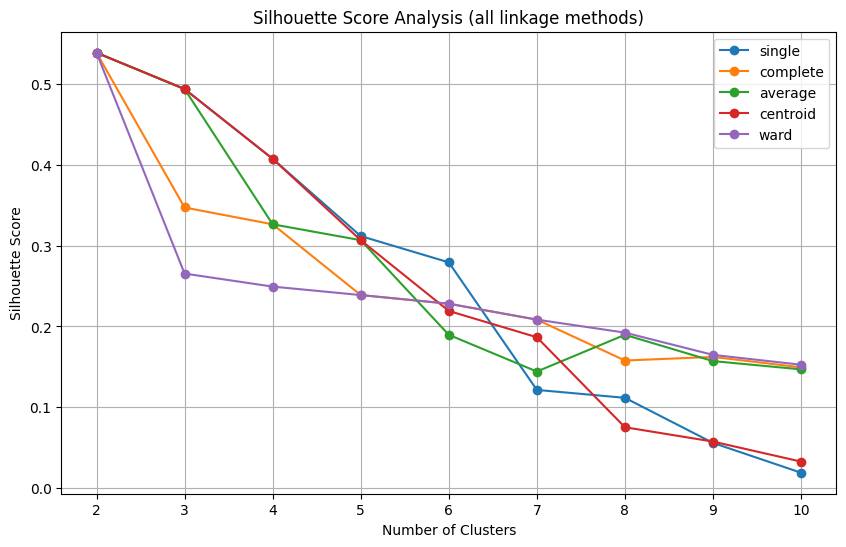

In [39]:
plt.figure(figsize=(10, 6))

for i, m in enumerate(linkage_methods):
    plt.plot(range_n_clusters, all_silhouette_scores[i], marker='o', label=m)

plt.legend()
plt.title(f'Silhouette Score Analysis (all linkage methods)')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()